In [551]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

df=pd.read_csv('./share_bike.csv')

In [552]:
def findOutliers(data):
    Q1=np.percentile(data,25)
    Q3=np.percentile(data,75)
    IQR=Q3-Q1

    upOutliers=np.where(data>=Q3+1.5*IQR)[0]
    lowOutliers=np.where(data<=Q1-1.5*IQR)[0]
    outliers=np.concatenate((upOutliers,lowOutliers))

    return outliers

### wash holiday&workday data

In [553]:
df['datetime']=pd.to_datetime(df['datetime'])
#df['datetime']=df['datetime'].dt.hour
#df.rename(columns={'datetime':'hours'},inplace=True)

pd.options.mode.copy_on_write = True

for i in range(len(df)):
    #data=df.iloc[i]
    #print(type(data))
    #print(data)
    df.loc[i,"holiday"]=0
    df.loc[i,"workingday"]=1
    #print(df.loc[i,"datetime"].dayofweek)
    if(df.loc[i,"datetime"].dayofweek == 5 or df.loc[i,"datetime"].dayofweek == 6):
        df.loc[i,"workingday"]=0
        df.loc[i,"holiday"]=1

print(df.iloc[40])

datetime      2011-01-02 17:00:00
season                          1
holiday                         1
workingday                      0
weather                         1
temp                        13.94
atemp                      16.665
humidity                       57
windspeed                  12.998
casual                          7
registered                     58
count                          65
Name: 40, dtype: object


##### wash wind speed data

In [554]:
df.loc[0,"windspeed"]=6.0032
for i in range(1,len(df)):
    if(df.loc[i,"windspeed"]==0):
        if(df.loc[i+1,"windspeed"]!=0):
            df.loc[i,"windspeed"]=np.mean([df.loc[i-1,"windspeed"],df.loc[i+1,"windspeed"]])
        else:
            df.loc[i,"windspeed"]=df.loc[i-1,"windspeed"]
#print(df)

### analysis based on hour

In [555]:
def hourAnalysis(df):
    hourData=df.loc[:,['datetime','count']]
    hourData['datetime']=hourData['datetime'].dt.hour
    hourData.rename(columns={'datetime':'hour'},inplace=True)
    #print(hourData)

    plt.figure()
    plt.xlabel("hour")
    plt.ylabel("counts")
    plt.xticks(range(0,24))
    plt.scatter(hourData["hour"],hourData['count'],s=1)

### analysis based on temperature

In [556]:
def tempAnalysis(df):
    tempData=df.loc[:,['temp','count']]
    tempData=tempData.reset_index()
    
    x=np.array(tempData['temp']).reshape(-1,1)
    y=np.array(tempData['count']).reshape(-1,1)

    print(np.shape(x))
    print(np.shape(y))

    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=91)

    model=LinearRegression()
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    print(r2_score(y_test,y_pred))

#print(tempData["temp"])

    olList=findOutliers(tempData['count'])
#print(olList)

    tempData.drop(index=olList,inplace=True)
#print(np.shape(tempData['temp']))
#print(np.shape(tempData['count']))

    plt.close()
    plt.figure(dpi=100)
    plt.xlabel("temp")
    plt.ylabel("counts")
    plt.scatter(tempData['temp'],tempData['count'],s=1)
    plt.plot(x,model.predict(x),color="red")

### based on actual temp

In [557]:
def atAnalysis(df):
    atData=df.loc[:,['atemp','count']]
    atData=atData.reset_index()
    #print(atData["atemp"])

    olList=findOutliers(atData['count'])
    #print(olList)

    atData.drop(index=olList,inplace=True)

    plt.close()
    plt.figure(dpi=100)
    plt.xlabel("atemp")
    plt.ylabel("counts")
    plt.scatter(atData["atemp"],atData['count'],s=1)

### analysis based on humidity

In [558]:
def humAnalysis(df):
    humData=df.loc[:,['humidity','count']]
    humData=humData.reset_index()
#print(humData["humidity"])

    olList=findOutliers(humData['count'])
#print(olList)

    humData.drop(index=olList,inplace=True)
    plt.close()
    plt.figure(dpi=100)
    plt.xlabel("humidity")
    plt.ylabel("counts")
    plt.scatter(humData["humidity"],humData['count'],s=1)

### analysis based on wind speed

In [559]:
def wsAnalysis(df):
    wsData=df.loc[:,['windspeed','count']]

    wsData=wsData.reset_index()
#print(wsData["windspeed"])

    olList=findOutliers(wsData['count'])
#print(olList)

    wsData.drop(index=olList,inplace=True)

    plt.close()
    plt.figure(dpi=100)
    plt.xlabel("windspeed")
    plt.ylabel("counts")
    plt.scatter(wsData["windspeed"],wsData['count'],s=1)

### weather based

In [560]:
def wtAnalysis(df):
    wtData=df.loc[:,['weather','count']]

    wtData=wtData.reset_index()
#print(wtData["weather"])

    olList=findOutliers(wtData['count'])
#print(olList)

    wtData.drop(index=olList,inplace=True)

    plt.close()
    plt.figure(dpi=100)
    plt.xlabel("weather")
    plt.ylabel("counts")
    plt.scatter(wtData["weather"],wtData['count'],s=1)

### casual & registered relationship

In [561]:
def crAnalysis(df):
    crData=df.loc[:,['casual','registered']]
    
#print(crData["weather"])

    crData=crData.reset_index()
#print(atData["atemp"])

    olList=findOutliers(crData['registered'])
#print(olList)

    crData.drop(index=olList,inplace=True)

    fig_axis_size=np.max([np.max(crData["casual"]),np.max(crData["registered"])])

#print(fig_axis_size)

    plt.close()
    plt.figure(dpi=100)
    plt.xlabel("casual")
    plt.ylabel("registered")
    plt.scatter(crData["casual"],crData['registered'],s=1)
    plt.plot([0,fig_axis_size],[0,fig_axis_size],color="red")

##### select partial data to use

In [562]:
df=df[df['season']>=3]
df=df[df['season']<=3]
df=df[df['holiday']==1]
df=df[df['datetime'].dt.hour>6]
df=df[df['datetime'].dt.hour<18]

df['counts']=df['registered']
#df['counts']=df['casual']
#print(df)

(165, 1)
(165, 1)
0.2700413396625423


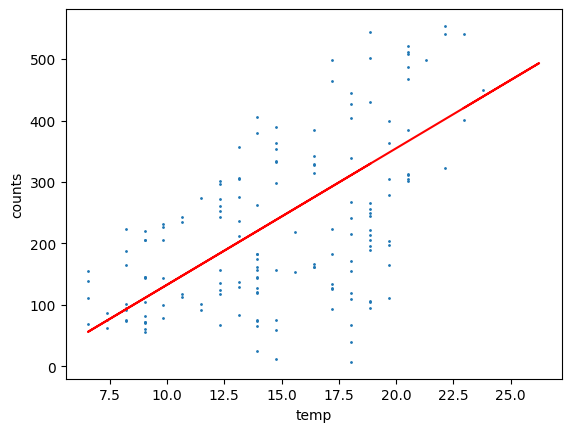

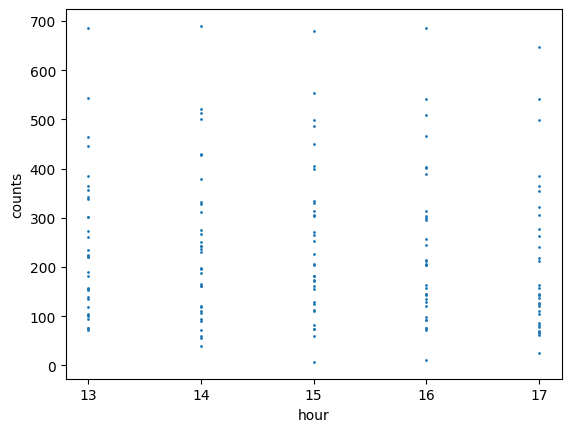

In [563]:
tempAnalysis(df)
hourAnalysis(df)